# Model Evaluation

Evaluating the effectiveness of our model

loading dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

Load in the model for testing

In [23]:
filename = 'my_saved_model1.sav'
model_A = pickle.load(open(filename, 'rb'))

Open and Parse testing data CSV and storing

In [24]:
mx_col = ['popularity','Year','Genre_Action','Genre_Adventure','Genre_Fighting','Genre_Misc','Genre_Platform','Genre_Puzzle','Genre_Racing','Genre_Role-Playing','Genre_Shooter','Genre_Simulation','Genre_Sports','Genre_Strategy']
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Global_Sales'])

Plot the test data features and targets to visually evaluate the model

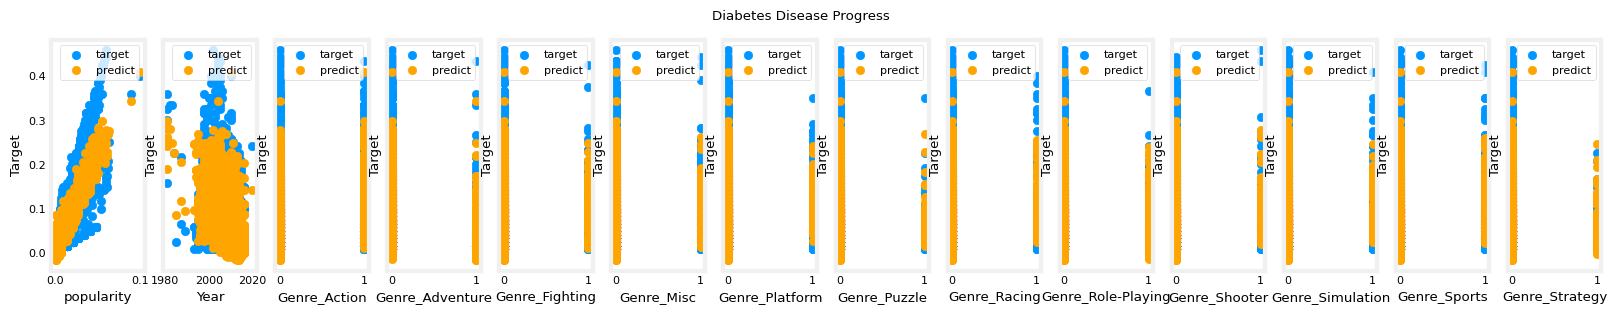

In [25]:
my_pred = model_A.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(20,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

Score is used to give a score-based evaluation of the model's accuracy/performance

In [26]:
test_score = model_A.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5105838632318558


Manually calculate loss and cost of the model from the testing data

In [6]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_A.predict(mx_test)
data['Cost'] = my_test - model_A.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     popularity    Year Genre_Action Genre_Adventure Genre_Fighting  \
0      0.010999  2004.0         True           False          False   
1      0.006341  2014.0        False           False          False   
2      0.020208  2008.0         True           False          False   
3      0.013135  2016.0         True           False          False   
4      0.005903  2005.0         True           False          False   
...         ...     ...          ...             ...            ...   
1814   0.013783  2010.0        False           False          False   
1815   0.021911  2008.0        False           False          False   
1816   0.025032  2011.0        False           False          False   
1817    0.04135  2013.0        False           False          False   
1818   0.020675  2009.0        False           False           True   

     Genre_Misc Genre_Platform Genre_Puzzle Genre_Racing Genre_Role-Playing  \
0         False          False        False        False            

Manual Prediction of model

In [7]:
print(model_A.predict([[0.1,0.1,False,False,False,False,False,False,False,False,False,False,False,True]]))
print(model_A.predict([[1,1,False,False,False,False,True,False,False,False,False,False,False,False]]))

[4.84802018]
[8.34315114]


Move the model into deployment folder